# JUPYTER NOTEBOOK EXAMPLE: REPULSIVE FITTING FOR DFTB USING TWO ASE-DATABASES
## 1. Import modules
Import the modules needed to complete the fitting task.

In [1]:
from ccs.scripts.ccs_fetch import ccs_fetch as ccs_fetch
from ccs.fitting.main import twp_fit as ccs_fit
import json
import numpy as np
import matplotlib.pyplot as plt

## 2. Fetch the data
The next commands fetch the training-set data from two ase-databases, 'DFT.db'  and 'DFTB.db'. The databeses contains forces and energies from a set of DFT and DFTB calculations. The example "XYZ" show an example of how to build such databases from a set of calculations.

In [2]:
ccs_fetch(mode='DFTB', R_c= 6.0, Ns='all', DFT_DB='DFT.db', DFTB_DB='DFTB.db')

100%|██████████| 75/75 [00:01<00:00, 70.41it/s]


## 3. Perform fitting

In [4]:
#DEFINE INPUT

input={
        "General": {
                "interface": "DFTB"
        },
        "Twobody": {
                "Ce-O": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "rep"
                }
        }
}

#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

#RUN FIT
ccs_fit("CCS_input.json")

Generating one-body information from training-set.
    Added elements:  Ce O
    Adding pair: Ce-Ce
    Failed adding pair: Ce-Ce
    Adding pair: O-O
    Failed adding pair: O-O
There is linear dependence in stochiometry matrix!
    removing onebody term: O


Finding optimum switch: 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]


## 4. Plot the results

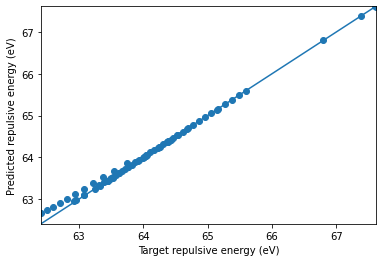

In [6]:
#READ IN THE CCS FITTING ERROR OUTPUT FILE
error=np.loadtxt("CCS_error.out")

#MAKE THE PLOT
EDFT=error[:,0]/ error[:,3]
EDFTB=error[:,1]/ error[:,3]
x_line=[min(EDFT), max(EDFT)]
plt.plot(x_line,x_line,'-')
plt.xlim(x_line)
plt.ylim(x_line)
plt.xlabel('Target repulsive energy (eV)')
plt.ylabel('Predicted repulsive energy (eV)')
plt.scatter(EDFT,EDFTB)
plt.show()

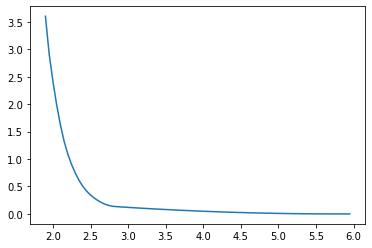

In [7]:
import json
with open("CCS_params.json", 'r') as f:
    CCS_params = json.load(f)

x=CCS_params["Two_body"]["Ce-O"]["r"][1:-1]
y=CCS_params["Two_body"]["Ce-O"]["spl_a"][1:-1]

plt.plot(x,y,'-')

# Reset the noteboob

In [9]:
rm *.json CCS_error.out 

rm: cannot remove '*.json': No such file or directory
